In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r'Pokemon1.csv', header=0,
               index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


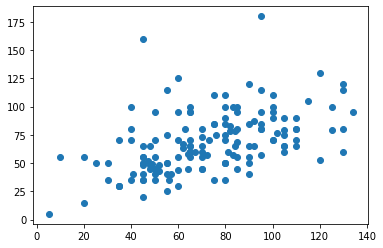

In [4]:
#Scatter plot is useful to visualize the relationship between two continuous variables
plt.scatter(data=df, x='Attack',y='Defense')


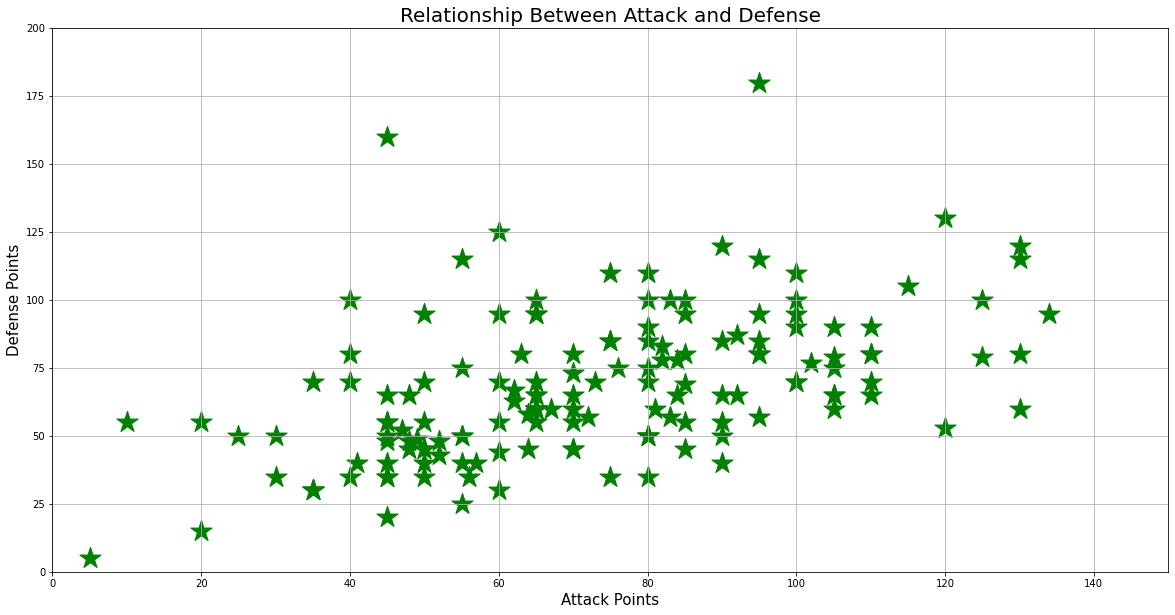

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(data=df, x='Attack',y='Defense',s=500, c='green', marker='*')
#change axes ranges
plt.xlim(0,150)
plt.ylim(0,200)
#add title
plt.title('Relationship Between Attack and Defense',size=20)
#add x and y labels
plt.xlabel('Attack Points',size=15)
plt.ylabel('Defense Points',size=15)
plt.grid(True)
#show plot
plt.savefig("test.jpg")
plt.show()


In [6]:
import os
os.getcwd()

'C:\\Users\\Nikita Tandel\\mypython\\niks\\niks'

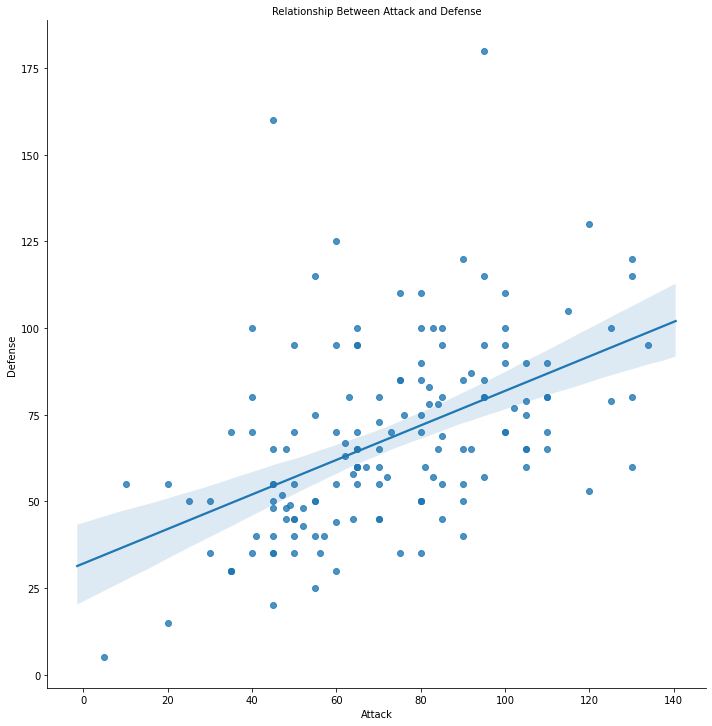

In [7]:
#scatter plot with regression line
sns.lmplot(data=df, x='Attack', y='Defense',height=10,aspect=1)
plt.title('Relationship Between Attack and Defense',size=10)
plt.show()

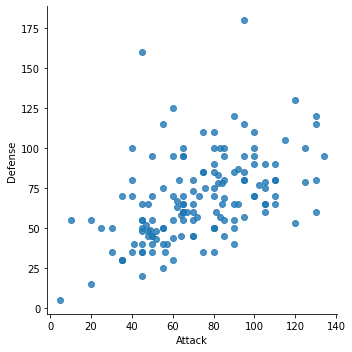

In [8]:
sns.lmplot(data=df, x='Attack', y='Defense',fit_reg=False)

In [9]:
import warnings
warnings.filterwarnings("ignore")

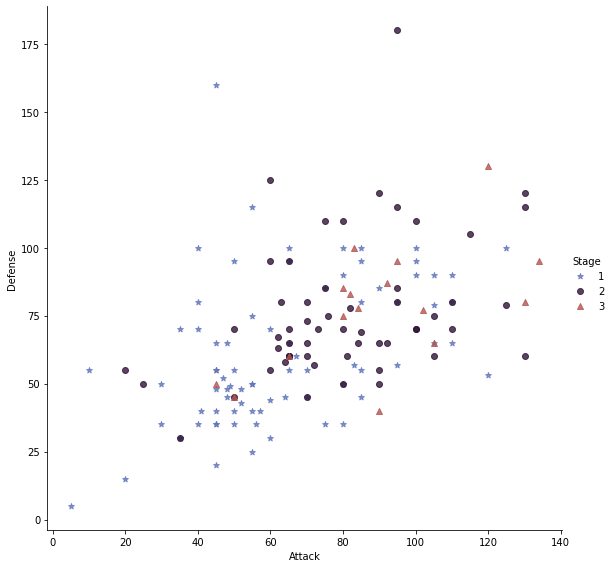

In [10]:
#plt.figure(figsize=(20,20))

sns.lmplot( data=df, x='Attack', y='Defense',
           fit_reg=False, # No regression line
           hue='Stage',palette="twilight",markers=["*","o","^"],height=8)   # Color by evolution stage
plt.savefig("test.jpg")
plt.show()


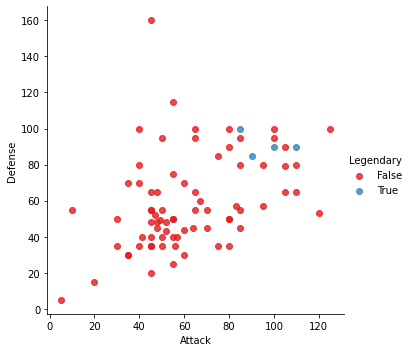

In [11]:
sns.lmplot( data=df[df["Stage"]==1], x='Attack', y='Defense',
           fit_reg=False, # No regression line
           hue='Legendary',palette="Set1")   

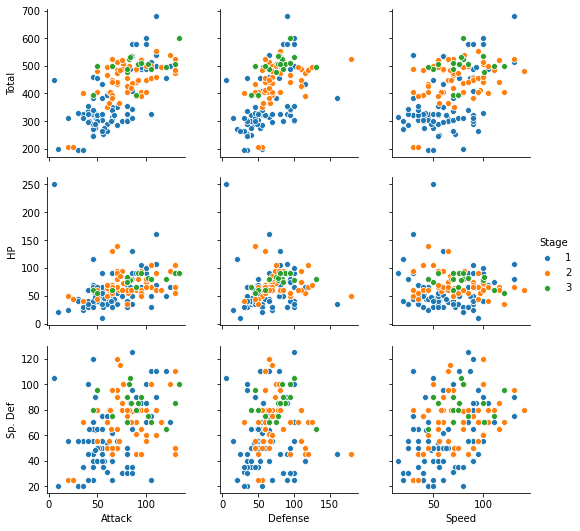

In [12]:

sns.pairplot(data=df,x_vars=["Attack","Defense","Speed"],y_vars=["Total","HP","Sp. Def"],
             kind='scatter',hue="Stage")


In [13]:
#df.columns[:-1]

colname=[]
for i in df.columns:
    if df[i].dtype=="int64" or df[i].dtype=="float64":
        colname.append(i)

print(colname)

['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage']


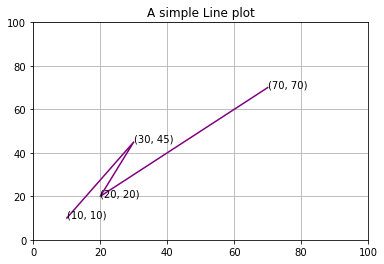

In [14]:
# Line Plot
#line plot is useful to visualize a single continuous variable across the time(to see the trend)
x = [10,30,20,70]
y = [10,45,20,70]
plt.plot(x, y, c="purple")

plt.xlim(0,100)
plt.ylim(0,100)
plt.title('A simple Line plot')
plt.grid(True)
plt.savefig("test.jpg")
for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y,(i_x,i_y))

plt.show()



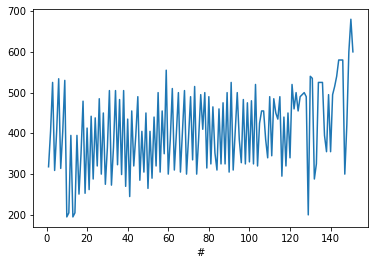

In [15]:
df.Total.plot()

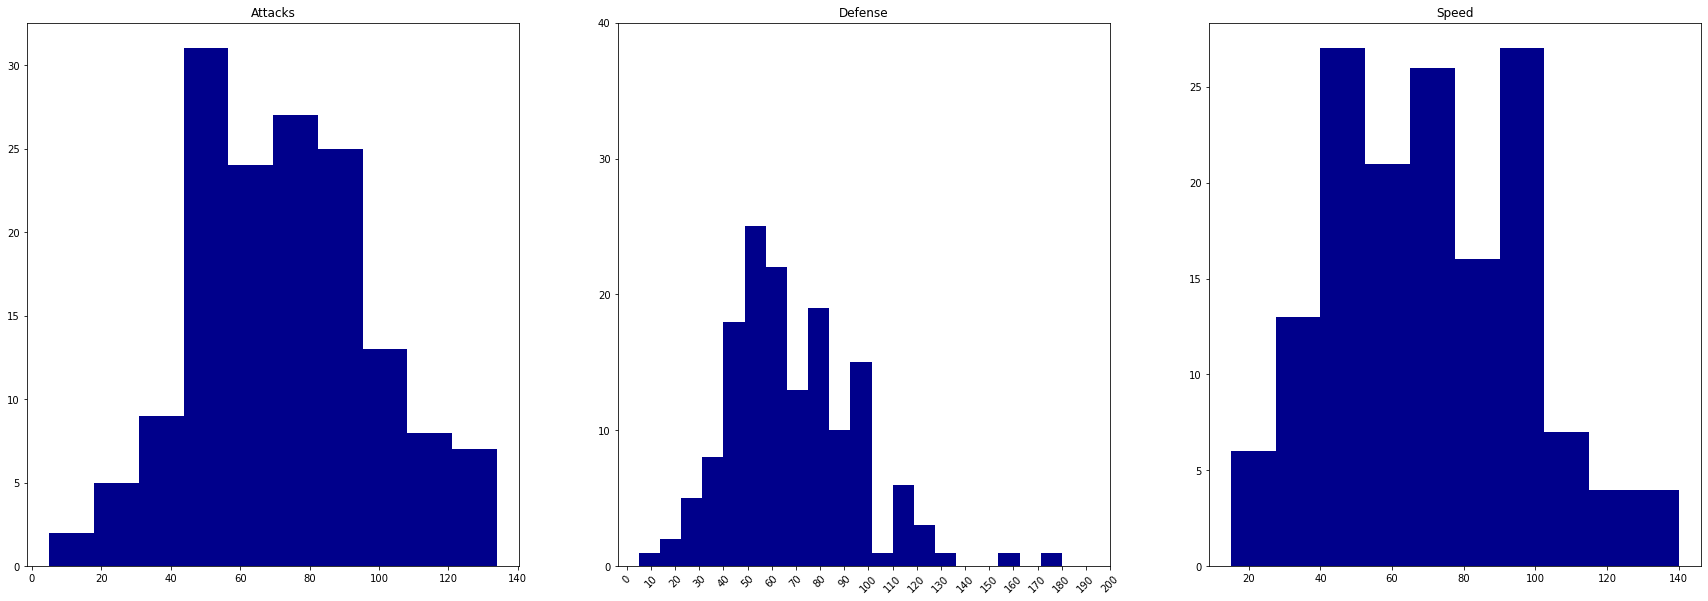

In [16]:
#histograms are useful to visualize the frequency distribution of a single continuous variable

import numpy as np
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.hist(x="Attack",data=df, bins=10,color='darkblue')
plt.title('Attacks')

plt.subplot(132)
plt.hist(x="Defense",data=df, bins=20,color='darkblue')
plt.title('Defense')
plt.xticks(np.arange(0,201,10),rotation=45)# array from 0 to 200 with a increment value of 10
plt.yticks(np.arange(0,41,10))

plt.subplot(133)
plt.hist(x="Speed",data=df, bins=10,color='darkblue')
plt.title('Speed')
plt.show()



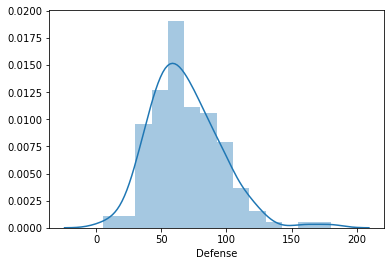

In [19]:
# Distribution Plot
sns.distplot(df.Defense)

In [23]:
df["Type 1"].value_counts()

Water       28
Normal      22
Poison      14
Fire        12
Bug         12
Grass       12
Electric     9
Rock         9
Psychic      8
Ground       8
Fighting     7
Ghost        3
Dragon       3
Ice          2
Fairy        2
Name: Type 1, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

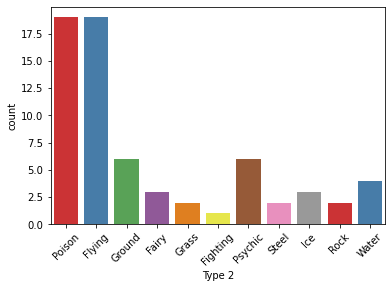

In [25]:
#countplot are useful to visualize the frequency distribution of a single discrete/categorical variable

sns.countplot(x='Type 2',data=df,palette="Set1")

# Rotate x-labels
plt.xticks(rotation=45)


In [40]:
df["Type 1"].value_counts().index[::-1]

Index(['Fairy', 'Ice', 'Dragon', 'Ghost', 'Fighting', 'Ground', 'Psychic',
       'Rock', 'Electric', 'Grass', 'Bug', 'Fire', 'Poison', 'Normal',
       'Water'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

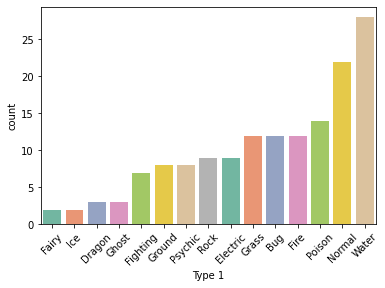

In [41]:
# Count Plot (a.k.a. Frequency bar Plot)
sns.countplot(x='Type 1',data=df,palette="Set2",
              order=df["Type 1"].value_counts().index[::-1])
 
# Rotate x-labels
plt.xticks(rotation=45,size=10)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

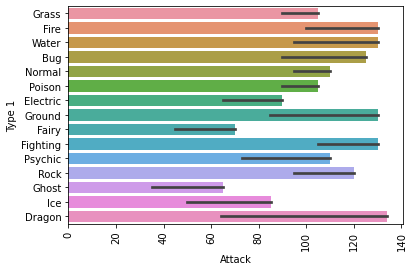

In [46]:
#bar graphs is useful to visualize the relationship between one categorical and one numerical variable
import numpy as np
sns.barplot(y="Type 1", x="Attack", data=df,estimator=np.max)
plt.xticks(rotation=90)


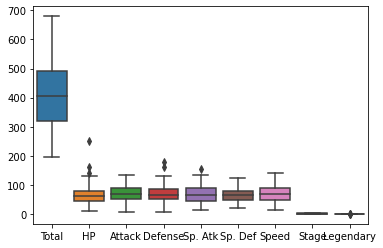

In [48]:
#Boxplots are useful to visualize the distribution of single continuous variable, but more widely used to detect outliers in the variable.
#generate boxplots only for selected or individual variables for better represenattion.
sns.boxplot(data=df)

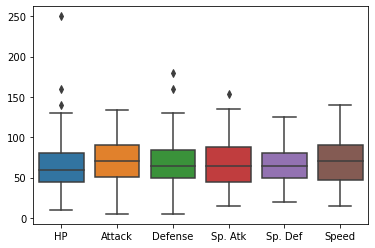

In [49]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

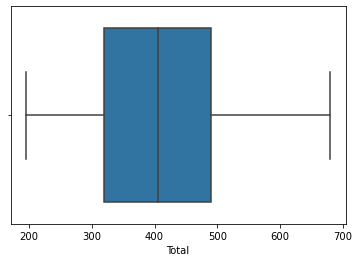

In [51]:
sns.boxplot(y=df["Total"])

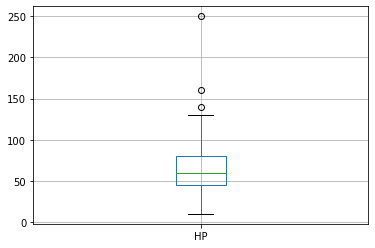

In [47]:
#using pandas
df.boxplot(column='HP') 
plt.show()

In [52]:
X=df[["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]]

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000


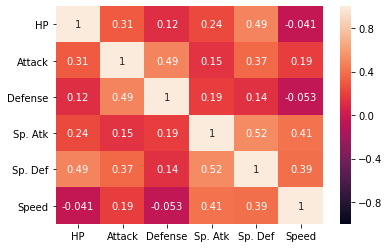

In [53]:
#Heatmaps are useful to visualize the magnitude of relationship between multiple  variables usig the coreelation matrix.
#Pairs which show high correlation, <-0.75 or >0.75, should be considered and we can eliminate one variable out of the pair leading to fetaure selection.
#value close to 1-->high positive correlation
#value close to -1-->high negative correlation
#value close to 0-->no correlation


corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

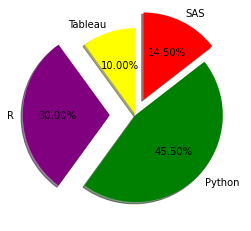

In [61]:
# Pie charts are useful to visualize the % distriubtion of a single categorical variable
import matplotlib.pyplot as plt

# slices will be plotted counter-clockwise:
labels = ['SAS', 'Python', 'R', 'Tableau']
sizes = [14.5, 45.5, 30, 10]
explode = [0.2, 0, 0.3, 0]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', 
        colors=["red","green","purple","yellow"],
        shadow=True, startangle=90,counterclock=False)

plt.show()
